In [ ]:
import pandas as pd
import re
import string
import math
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# import dataset from local computer
from google.colab import files
uploaded = files.upload()


Saving DatasetPulp.xlsx to DatasetPulp.xlsx


In [ ]:
df=pd.read_excel('DatasetPulp.xlsx')
df

,Nomor PEB,Tanggal,Barang,Kode Barang,Jumlah Kms Brg,Jenis Kms Brg,Produksi,Jenis Satuan,Jml Container,Pelabuhan Muat,Pelabuhan Bongkar,Negara Penerima
0,1,2022-01-01,NAPKIN TISSUE BASIS WEIGHT 18 GSM +/-0.5NAPKIN...,48183000,136.00,RO,16.885,TNE,1,IDPWG,TWKHH,TW
1,2,2022-01-01,NAPKIN TISSUE,48183000,908.00,RO,155.093,TNE,16,IDPWG,GRSKG,GR
2,3,2022-01-01,JUMBO ROLL TISSUE,48183000,484.00,RO,156.500,TNE,21,IDPWG,KRPUS,KR
3,4,2022-01-01,FACIAL TISSUE,48181000,4.39,BL,160.148,TNE,3,IDPWG,AUBNE,AU
4,5,2022-01-01,MULTI PURPOSE TISSUE,48183000,244.00,RO,153.148,TNE,3,IDPWG,VNCLI,VN
...,...,...,...,...,...,...,...,...,...,...,...,...
3776,3777,2022-12-31,JUMBO KITCHEN TOWEL TISSUE PP ORIGINAL000,48183000,54.00,RO,150.035,TNE,3,IDPWG,USLGB,US
3777,3778,2022-12-31,JUMBO KITCHEN TOWEL TISSUE PP ORIGINAL000,48183000,54.00,RO,150.035,TNE,3,IDPWG,USLGB,US
3778,3779,2022-12-31,JUMBO ROLL TISSUE,48183000,80.00,RO,169.635,TNE,2,IDPWG,KRICH,KR
3779,3780,2022-12-31,JUMBO TOILET TISSUE IN REELS,48183000,126.00,RO,97.740,TNE,7,IDPWG,ZADUR,ZA


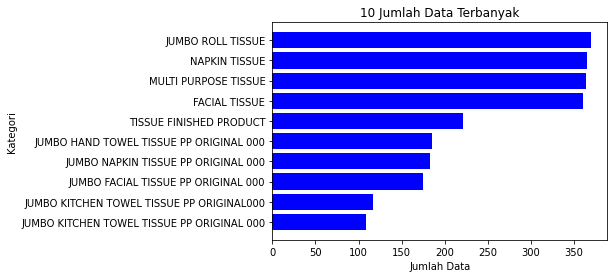

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# membaca file csv
df = pd.read_excel('DatasetPulp.xlsx')

# membuat dataframe baru untuk menghitung jumlah data yang sama di kolom
count_df = pd.DataFrame({'count': df.groupby(['Barang']).size()}).reset_index()

# mengurutkan dataframe berdasarkan jumlah data terbanyak dan mengambil 10 nilai teratas
top_10_counts = count_df.sort_values('count', ascending=False).head(10)

# membuat plot diagram batang
plt.barh(top_10_counts['Barang'], top_10_counts['count'], color='blue')

# menambahkan label pada sumbu x dan y
plt.xlabel('Jumlah Data')
plt.ylabel('Kategori')

# menambahkan judul diagram
plt.title('10 Jumlah Data Terbanyak')

# membalikkan sumbu x agar diagram batang ke kanan
plt.gca().invert_yaxis()

# menampilkan diagram
plt.show()

In [ ]:
df.columns

Index(['Nomor PEB', 'Tanggal', 'Barang', 'Kode Barang', 'Jumlah Kms Brg',
       'Jenis Kms Brg', 'Produksi', 'Jenis Satuan', 'Jml Container',
       'Pelabuhan Muat', 'Pelabuhan Bongkar', 'Negara Penerima'],
      dtype='object')

In [ ]:
df=df.query('Barang == "MULTI PURPOSE TISSUE"')
df

,Nomor PEB,Tanggal,Barang,Kode Barang,Jumlah Kms Brg,Jenis Kms Brg,Produksi,Jenis Satuan,Jml Container,Pelabuhan Muat,Pelabuhan Bongkar,Negara Penerima
4,5,2022-01-01,MULTI PURPOSE TISSUE,48183000,244.0,RO,153.148,TNE,3,IDPWG,VNCLI,VN
7,8,2022-01-02,MULTI PURPOSE TISSUE,48183000,304.0,RO,154.482,TNE,3,IDPWG,AUMEL,AU
11,12,2022-01-03,MULTI PURPOSE TISSUE,48183000,84.0,RO,155.974,TNE,21,IDPWG,NZAKL,NZ
16,17,2022-01-04,MULTI PURPOSE TISSUE,48183000,262.0,RO,154.453,TNE,3,IDPWG,VNCLI,VN
34,35,2022-01-05,MULTI PURPOSE TISSUE,48183000,111.0,RO,154.319,TNE,1,IDPWG,VNCLI,VN
...,...,...,...,...,...,...,...,...,...,...,...,...
3699,3700,2022-12-27,MULTI PURPOSE TISSUE,48183000,56.0,RO,164.650,TNE,14,IDPWG,AUSYD,AU
3704,3705,2022-12-28,MULTI PURPOSE TISSUE,48183000,28.0,RO,163.650,TNE,7,IDPWG,AUSYD,AU
3719,3720,2022-12-29,MULTI PURPOSE TISSUE,48183000,20.0,RO,162.650,TNE,5,IDPWG,AUSYD,AU
3729,3730,2022-12-30,MULTI PURPOSE TISSUE,48183000,380.0,RO,164.150,TNE,5,IDPWG,PLGDY,PL


In [ ]:
df = df[['Tanggal','Produksi']]
df.dtypes

Tanggal     datetime64[ns]
Produksi           float64
dtype: object

In [ ]:
df['Tanggal']= pd.to_datetime(df.Tanggal)
df['Produksi'] = df['Produksi'].astype(float)

<ipython-input-52-61c2c543ce37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tanggal']= pd.to_datetime(df.Tanggal)
<ipython-input-52-61c2c543ce37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Produksi'] = df['Produksi'].astype(float)


In [ ]:
df.dtypes

Tanggal     datetime64[ns]
Produksi           float64
dtype: object

In [ ]:
df.index = df.pop('Tanggal')
df

,Produksi
Tanggal,
2022-01-01,153.148
2022-01-02,154.482
2022-01-03,155.974
2022-01-04,154.453
2022-01-05,154.319
...,...
2022-12-27,164.650
2022-12-28,163.650
2022-12-29,162.650


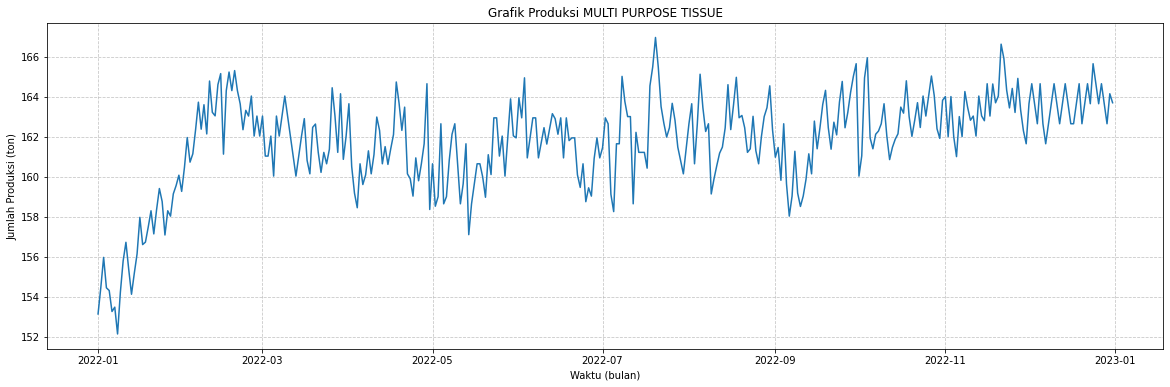

In [ ]:
#menampilkan grafik dataset
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df.index, df['Produksi'])
ax.set_xlabel('Waktu (bulan)')
ax.set_ylabel('Jumlah Produksi (ton)')
ax.set_title('Grafik Produksi MULTI PURPOSE TISSUE')
ax.grid(linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df.shape

(364, 1)

In [ ]:
#scalling
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)

In [ ]:
# split data
train_size = int(len(df) * 0.75)
test_size = len(df) - train_size
train = df[0:train_size,:]
test = df[train_size:len(df),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 273, test size: 91 


In [ ]:
# menentukan timestamp
time_stemp = 1
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = np.array(dataX)
trainY = np.array(dataY)

In [ ]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = np.array(dataX)
testY = np.array(dataY)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# melatih model
model = Sequential()
model.add(LSTM(10, input_shape=(1, time_stemp))) # 10 lstm neuron(block)
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
model.fit(trainX, trainY, epochs=50, batch_size=1)

Epoch 1/50
271/271 [==============================] - 3s 2ms/step - loss: 0.0726 - mean_squared_error: 0.0726
Epoch 2/50
271/271 [==============================] - 1s 2ms/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 3/50
271/271 [==============================] - 1s 2ms/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 4/50
271/271 [==============================] - 1s 2ms/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 5/50
271/271 [==============================] - 1s 2ms/step - loss: 0.0117 - mean_squared_error: 0.0117
Epoch 6/50
271/271 [==============================] - 1s 2ms/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 7/50
271/271 [==============================] - 1s 2ms/step - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 8/50
271/271 [==============================] - 1s 2ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 9/50
271/271 [==============================] - 1s 2ms/step - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 10/5

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10)                480       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score MULTI PURPOSE TISSUE : %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score MULTI PURPOSE TISSUE : %.2f RMSE' % (testScore))

3/3 [==============================] - 0s 3ms/step
Train Score MULTI PURPOSE TISSUE : 1.51 RMSE
Test Score MULTI PURPOSE TISSUE : 1.29 RMSE


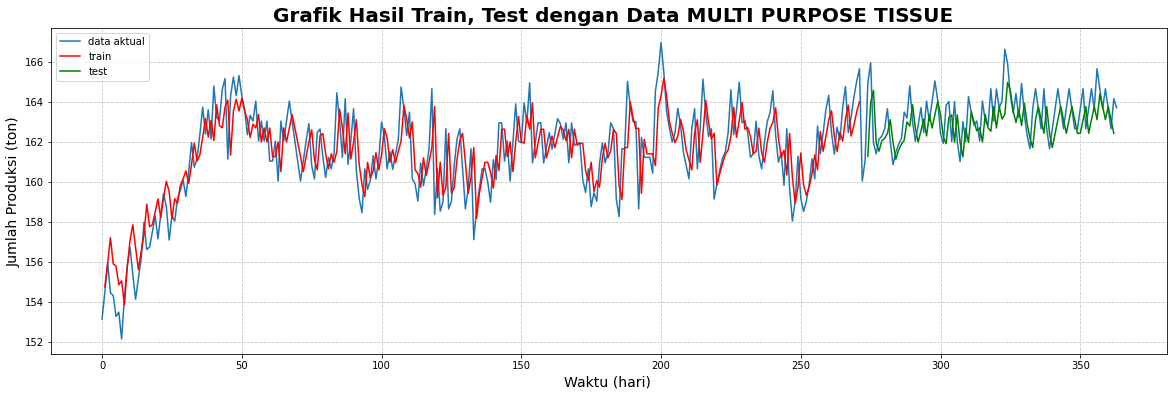

In [ ]:
# shifting train
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(df)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,6))
plt.plot(scaler.inverse_transform(df),label='data aktual')
plt.plot(trainPredictPlot,color='red',label='train')
plt.plot(testPredictPlot,color='green',label='test' )
plt.title(' Grafik Hasil Train, Test dengan Data MULTI PURPOSE TISSUE', fontsize=20 , fontweight='bold')
plt.xlabel('Waktu (hari) ', fontsize=14)
plt.ylabel('Jumlah Produksi (ton)', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()

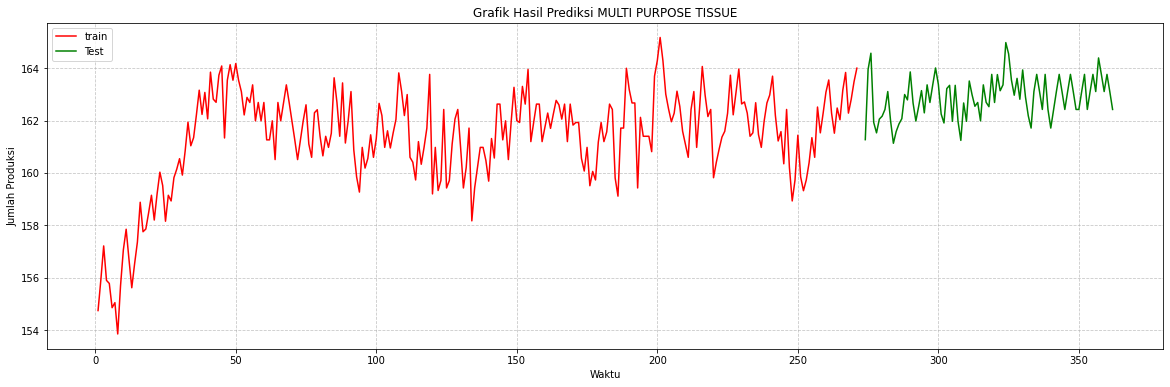

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(trainPredictPlot,color='red',label='train')
plt.plot(testPredictPlot,color='green',label='Test')
plt.title('Grafik Hasil Prediksi MULTI PURPOSE TISSUE')
plt.xlabel('Waktu')
plt.ylabel('Jumlah Produksi')
plt.grid(linestyle='--', alpha=0.7)
plt.legend()
plt.show()